In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np # linear algebra
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import load_boston
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import math
from datetime import datetime, date 
import warnings
warnings.filterwarnings('ignore')

print("Setup Complete")

Setup Complete


In [36]:
flood = pd.read_csv("Flood_pre_2016.csv", encoding= 'cp949')
flood.head()

,ID,Flood Event,Megalopolis 3hr Rainfall,Province 3hr Rainfall,SUM 3hr Rainfall,Megalopolis Financial Loss,Log10 Megalopolis Financial Loss,Province Financial Loss,Log10 Province Financial Loss,SUM Financial Loss,Log10 Financial loss,Megalopolis Population,Province Population,SUM Population in Flood,NAVER Data Lab,News,day
0,1,2016.04.16-2016.04.18,0.0,697.0,697.0,0,0.000000,6418208,6.807414,6418208,6.807414,0,6480150,6362584,11.94547,59,3
1,2,2016.05.02-2016.05.05,26.0,534.6,560.6,44043,4.643877,18656597,7.270832,18700640,7.271856,555927,9965456,10521383,11.09016,90,4
2,3,2016.07.01-2016.07.07,1127.5,2665.7,3793.2,633459,5.801719,8233736,6.915597,8867195,6.947786,7723803,13509579,21233856,162.16290,783,7
3,4,2016.07.24-2016.07.25,52.0,0.0,52.0,24000,4.380211,0,0.000000,24000,4.380211,351518,0,351518,7.11799,50,2
4,5,2016.07.29,38.0,316.1,354.1,8400,3.924279,61916,4.791803,70316,4.847054,531827,2127160,2658987,4.03015,24,1


In [37]:
flood.columns = ['ID', 'flood_event', 'megalopolis_rainfall', 'province_rainfall', 'rainfall', 'megalopolis_financial_loss', 'log10_megalopolis_loss', 'province_financial_loss', 'log10_province_loss', 'financial_loss', 'log10_loss', 'megalopolis_population', 'province_population', 'population', 'naver', 'news', 'day']
flood.head()

,ID,flood_event,megalopolis_rainfall,province_rainfall,rainfall,megalopolis_financial_loss,log10_megalopolis_loss,province_financial_loss,log10_province_loss,financial_loss,log10_loss,megalopolis_population,province_population,population,naver,news,day
0,1,2016.04.16-2016.04.18,0.0,697.0,697.0,0,0.000000,6418208,6.807414,6418208,6.807414,0,6480150,6362584,11.94547,59,3
1,2,2016.05.02-2016.05.05,26.0,534.6,560.6,44043,4.643877,18656597,7.270832,18700640,7.271856,555927,9965456,10521383,11.09016,90,4
2,3,2016.07.01-2016.07.07,1127.5,2665.7,3793.2,633459,5.801719,8233736,6.915597,8867195,6.947786,7723803,13509579,21233856,162.16290,783,7
3,4,2016.07.24-2016.07.25,52.0,0.0,52.0,24000,4.380211,0,0.000000,24000,4.380211,351518,0,351518,7.11799,50,2
4,5,2016.07.29,38.0,316.1,354.1,8400,3.924279,61916,4.791803,70316,4.847054,531827,2127160,2658987,4.03015,24,1


In [6]:
#필요한 변수를 Index로 설정
flood.index = flood["ID"]

# Random Forest

In [38]:
# 필요한 패키지 import
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 입력 변수와 타겟 변수 분리
X = flood[['rainfall','financial_loss', 'population']]
y = flood['naver']

# 학습 데이터와 테스트 데이터 분리
split_idx = int(len(flood) * 0.7) # 최근 30%를 테스트 데이터로 사용
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 베이지안 최적화: 최적의 하이퍼파라미터 조합을 찾음

In [11]:
#pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [12]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# RandomForestRegressor 모델 정의
rf = RandomForestRegressor(random_state=1)

# 하이퍼파라미터 탐색 범위 설정
param_space = {
    'n_estimators': (100, 1000),  # 트리 개수 범위
    'min_samples_split': (2, 10),  # 분할에 필요한 최소 샘플 수 범위
    'min_samples_leaf': (1, 10),  # 리프 노드에 필요한 최소 샘플 수 범위
    'max_features': ['sqrt', 'auto', 'log2'],  # 트리의 최대 특성 개수
    'max_depth': (10, 100),  # 트리의 최대 깊이 범위
}

# 탐색 방법과 반복 횟수 설정
opt = BayesSearchCV(
    rf,
    param_space,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    n_jobs=-1,
    n_iter=50,  # 총 시도할 조합의 수
    cv=5  # 교차 검증 폴드 수
)

# 모델 훈련 및 최적 하이퍼파라미터 탐색
opt.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", opt.best_params_)

Best parameters found:  OrderedDict([('max_depth', 10), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])


# 모델 학습과 결과 평가

In [39]:
# 랜덤포레스트 모델 학습
rf = RandomForestRegressor(max_depth= 100 ,max_features='auto', min_samples_leaf=1, min_samples_split=2,  n_estimators=714, random_state=1)

rf.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 예측 결과 평가
mse = mean_squared_error(y_test, y_test_pred)
print('MSE:', mse)
from sklearn.metrics import r2_score
print("R2 : " + str(r2_score(y_train, y_train_pred)))
print("R2 : " + str(r2_score(y_test, y_test_pred)))

MSE: 1636.1278937125342
R2 : 0.9560266229928575
R2 : 0.6225827458973864


# 예측 결과 시각화

아래 코드의 경우 다른 데이터 예측을 위해 csv파일을 불러옴

In [11]:
flood = pd.read_csv("Flood_pre_2011.csv", encoding= 'cp949')
flood

,ID,EVENT,Megalopolis 3hr Rainfall,Province 3hr Rainfall,rainfall,Megalopolis Financial Loss,Log10 Megalopolis Financial Loss,Province Financial Loss,Log10 Province Financial Loss,financial_loss,log_financial_loss,Megalopolis Population,Province Population,population,Naver,news
0,1,2011.06.21-2011.07.03,1330.469446,3189.730005,4520.199451,2.996288e+05,5.476584,1.041092e+07,7.017489,1.071054e+07,7.029812,7593288,15417725,22603613,179.700715,637
1,2,2011.07.07-2011.07.16,1046.122962,5864.300000,6910.422962,4.164005e+06,6.619511,1.235402e+08,8.091808,1.277042e+08,8.106205,6550076,18969014,25519090,270.363243,530
2,3,2011.07.26-2011.07.29,3832.814899,3892.000000,7724.814899,4.162883e+07,7.619394,3.147375e+08,8.497948,3.563663e+08,8.551897,13702274,15460573,28755447,304.664029,677
3,4,2011.08.16-2011.08.16,0.000000,425.000000,425.000000,0.000000e+00,0.000000,3.370635e+06,6.527712,3.370635e+06,6.527712,0,6680751,6680751,27.855721,20
4,5,2011.09.11-2011.09.12,0.000000,144.551035,144.551035,0.000000e+00,0.000000,2.890674e+05,5.460999,2.890674e+05,5.460999,0,777511,777511,17.410431,7
5,6,2011.11.18-2011.11.18,0.000000,46.500000,46.500000,0.000000e+00,0.000000,1.653268e+05,5.218343,1.653268e+05,5.218343,0,482285,482285,13.775758,95
6,7,2012.04.20-2012.04.20,1.813728,2.100000,3.913728,4.794303e+04,4.680725,1.710457e+05,5.233112,2.189887e+05,5.340422,220931,151622,372553,12.199059,29
7,8,2012.06.30-2012.06.30,0.000000,160.000000,160.000000,0.000000e+00,0.000000,4.759541e+03,3.677565,4.759541e+03,3.677565,0,2235717,2235717,17.977624,6
8,9,2012.07.05-2012.07.06,1291.000000,2421.000000,3712.000000,3.613578e+05,5.557937,3.324674e+06,6.521749,3.686032e+06,6.566559,5530630,12023124,17146354,149.632944,83
9,10,2012.07.10-2012.07.10,16.523047,0.000000,16.523047,2.254816e+03,3.353111,0.000000e+00,0.000000,2.254816e+03,3.353111,450358,0,450358,12.662274,57


In [12]:
flood.columns = ['ID', 'flood_event', 'megalopolis_rainfall', 'province_rainfall', 'rainfall', 'megalopolis_financial_loss','log10_megalopolis_financial_loss', 'province_financial_loss', 'log10_province_financial_loss', 'financial_loss', 'log10_loss', 'Megalopolis Population', 'Province Population', 'population', 'naver','news']

In [14]:
x = flood[['rainfall','financial_loss', 'population']]
# predicting the output
predict_naver = rf.predict(x) #rf: 학습 모델명을 적어줌

In [15]:
predict_naver = pd.DataFrame(predict_naver)

In [16]:
#예측결과 csv로 저장
predict_naver.to_csv('2011_naver_flood_RF.csv')

In [17]:
flood['naver_rf']=predict_naver

In [18]:
print(np.corrcoef(flood['news'],flood['naver_rf']))
print(np.corrcoef(flood['population'],flood['naver_rf']))
print(np.corrcoef(flood['rainfall'],flood['naver_rf']))
print(np.corrcoef(flood['financial_loss'],flood['naver_rf']))

[[1.         0.70004111]
 [0.70004111 1.        ]]
[[1.         0.83791036]
 [0.83791036 1.        ]]
[[1.         0.83813122]
 [0.83813122 1.        ]]
[[1.         0.53139213]
 [0.53139213 1.        ]]


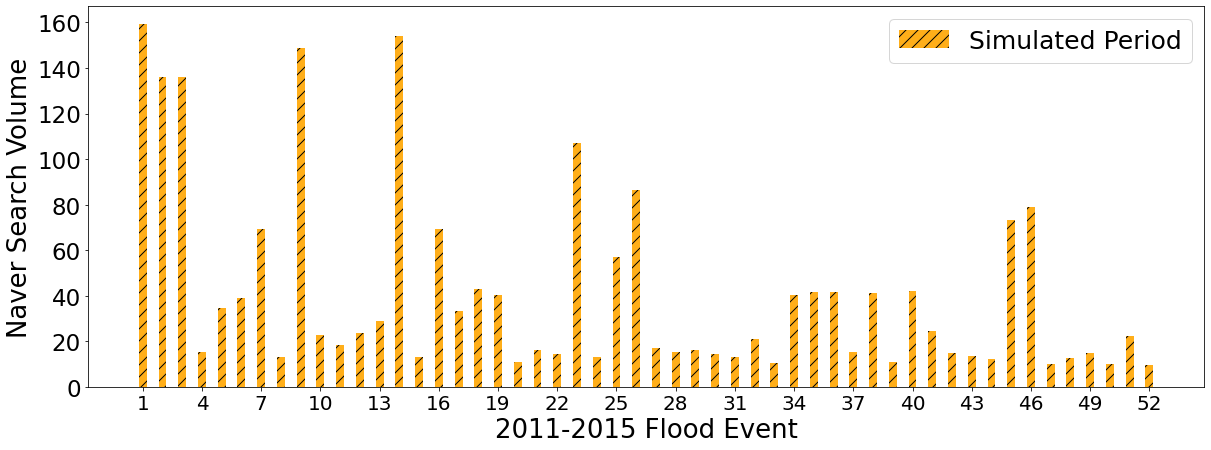

In [19]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 1, 1)

bar_width = 0.4  # 막대 그래프의 너비 설정

ax.bar(flood.ID, flood['naver_rf'], width=bar_width, color='orange', alpha=0.9, hatch='//', label='Simulated Period')
ax.set_ylabel('Naver Search Volume', fontsize=26)
plt.xlabel('2011-2015 Flood Event', fontsize=26)
plt.legend(fontsize=25)
plt.yticks(fontsize=23)
plt.xticks(flood.ID[::3], fontsize=20)  # x축 간격을 5로 설정
plt.show()

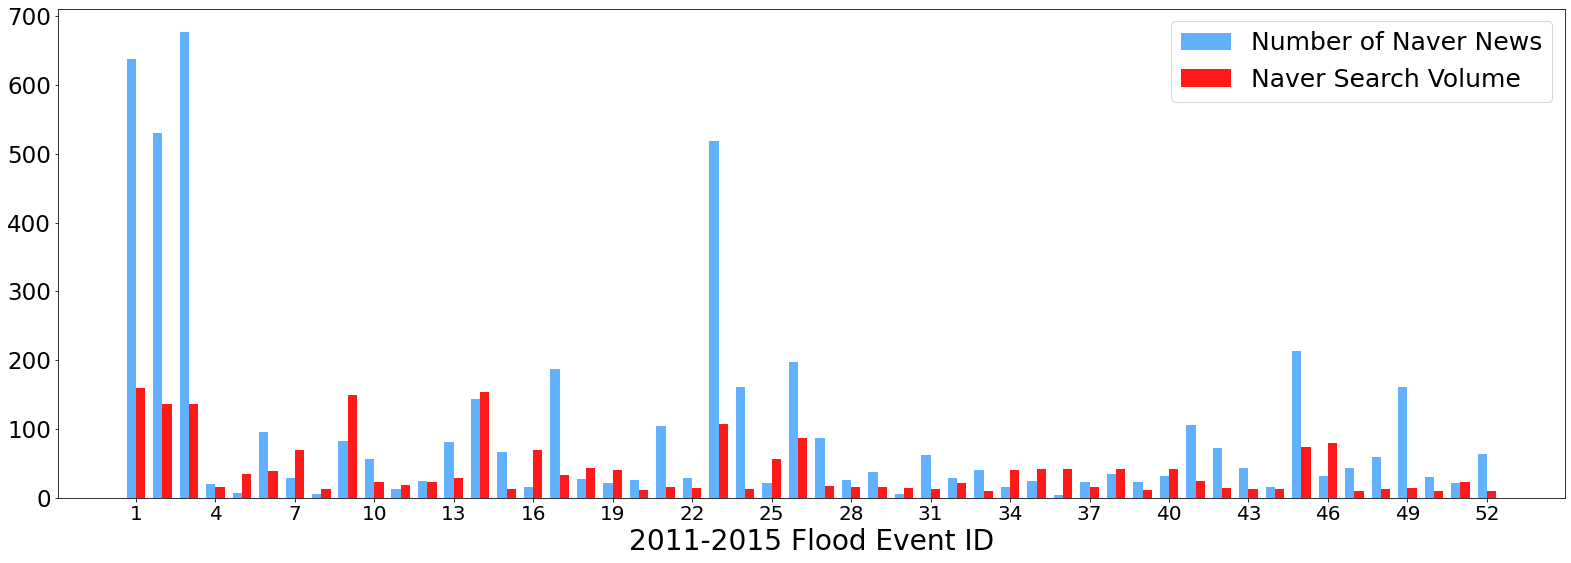

In [20]:
fig = plt.figure(figsize=(27,9)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1)

bar_width = 0.35  # 막대 그래프의 너비 설정

ax.bar(flood.ID - bar_width/2, flood['news'], width=bar_width, color='dodgerblue', alpha=0.7, label='Number of Naver News')
ax.bar(flood.ID + bar_width/2, flood['naver_rf'], width=bar_width, color='r', alpha=0.9, label='Naver Search Volume')

plt.xlabel('2011-2015 Flood Event ID', fontsize=28)
plt.legend(fontsize=25)
plt.yticks(fontsize=23)
plt.xticks(flood.ID[::3], fontsize=20)  # x축 간격을 5로 설정
plt.show()

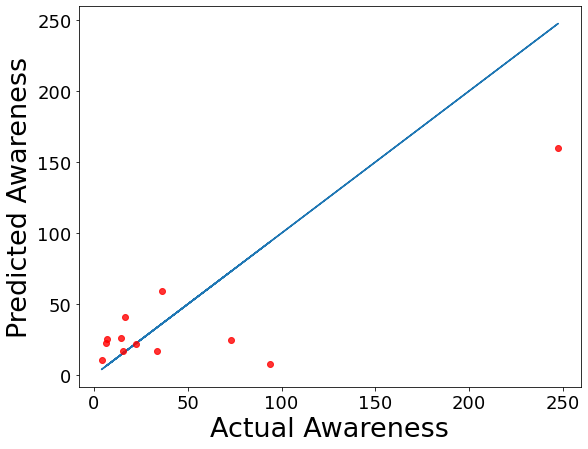

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,7))
y = y_test
plt.plot(y_test, y)
plt.plot(y_test,y_test_pred, 'ro',alpha = 0.8)
plt.xlabel('Actual Awareness', fontsize =27)
plt.ylabel('Predicted Awareness', fontsize =27)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.xlim
plt.ylim
plt.show()

# Feature importances: 각 Input이 모델 예측에 미치는 중요도 평가

rainfall: 0.4080629741512863
financial_loss: 0.16613300131964612
population: 0.42580402452906757


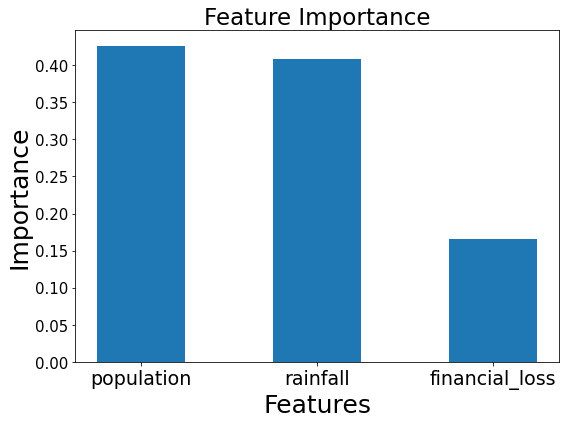

In [50]:
import matplotlib.pyplot as plt

# 특성 중요도를 계산
feature_importances = rf.feature_importances_

# 각 특성과 중요도를 출력
for feature_name, importance in zip(X.columns, feature_importances):
    print(f'{feature_name}: {importance}')

# 중요도를 기준으로 내림차순으로 정렬
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]


# 막대 그래프로 중요도를 시각화한다
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), sorted_importances, align='center', width=0.5)  # 막대 굵기 조절
plt.xticks(range(len(feature_importances)), sorted_features, fontsize=19)  # x축 눈금 크기와 레이블 크기 조절
plt.yticks(fontsize=15)  # y축 눈금 크기 조절
plt.xlabel('Features', fontsize=25)  # x축 레이블 크기 조절
plt.ylabel('Importance', fontsize=25)  # y축 레이블 크기 조절
plt.title('Feature Importance', fontsize=23)  # 타이틀 크기 조절
plt.tight_layout()
plt.show()

# XGBoost

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 입력 변수와 타겟 변수 분리
X = flood[['rainfall','financial_loss', 'population']]
y = flood['naver']

# 학습 데이터와 테스트 데이터 분리
split_idx = int(len(flood) * 0.8) # 최근 30%를 테스트 데이터로 사용
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

베이지안 최적화

In [59]:
from skopt import BayesSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# XGBRegressor 모델 정의
xgb_model = xgb.XGBRegressor(random_state=1)

# 하이퍼파라미터 탐색 범위 설정
param_space = {
    'n_estimators': (100, 1000),  # 트리의 개수
    'max_depth': (3, 10), # 트리의 최대 깊이
    'learning_rate': (0.01, 0.3), # 학습률
    'subsample': (0.5, 1.0), # 각 트리에 사용될 샘플의 비율
    'colsample_bytree': (0.5, 1.0) # 각 트리에 사용될 feature의 비율
}

# 탐색 방법과 반복 횟수 설정
opt = BayesSearchCV(
    xgb_model,
    param_space,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    n_jobs=-1,
    n_iter=50,
    cv=5
)

# 모델 훈련 및 최적 하이퍼파라미터 탐색
opt.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", opt.best_params_)

Best parameters found:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.3), ('max_depth', 3), ('n_estimators', 100), ('subsample', 0.5088525235965303)])


# 모델 학습과 결과 평가

In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBRegressor 모델 정의
xgb_model = xgb.XGBRegressor(random_state=1)

# 하이퍼파라미터 설정
params = {
    'n_estimators': 184,
    'max_depth': 4,
    'learning_rate': 0.27727263200916885,
    'subsample': 0.5,
    'colsample_bytree': 1
}

# 모델 훈련
xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측 수행
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# 예측 결과 평가
mse = mean_squared_error(y_test, y_test_pred)
print('MSE:', mse)
from sklearn.metrics import r2_score
print("R2 : " + str(r2_score(y_train, y_train_pred)))
print("R2 : " + str(r2_score(y_test, y_test_pred)))

MSE: 1882.3987998457048
R2 : 0.9999999810452002
R2 : 0.5657736849949173


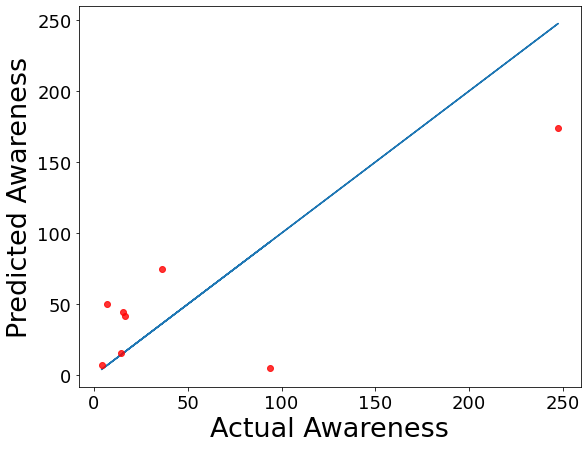

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,7))
y = y_test
plt.plot(y_test, y)
plt.plot(y_test,y_test_pred, 'ro',alpha = 0.8)
plt.xlabel('Actual Awareness', fontsize =27)
plt.ylabel('Predicted Awareness', fontsize =27)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.xlim
plt.ylim
plt.show()

rainfall: 0.5904925465583801
financial_loss: 0.2734454572200775
population: 0.13606204092502594


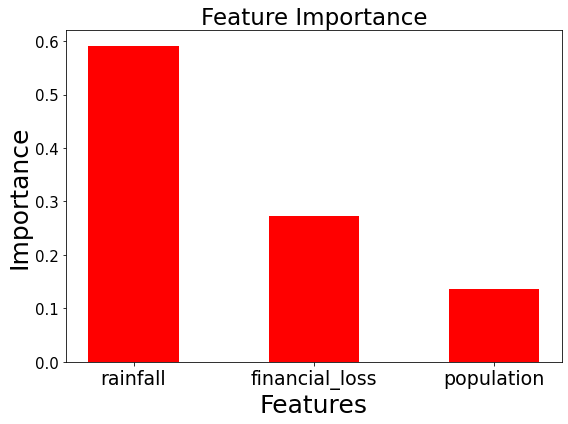

In [66]:
import matplotlib.pyplot as plt

# 특성 중요도를 계산
feature_importances = xgb_model.feature_importances_

# 각 특성과 중요도를 출력
for feature_name, importance in zip(X.columns, feature_importances):
    print(f'{feature_name}: {importance}')

# 중요도를 기준으로 내림차순으로 정렬
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]


# 막대 그래프로 중요도를 시각화한다
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), sorted_importances, align='center', color='r', width=0.5)  # 막대 굵기 조절
plt.xticks(range(len(feature_importances)), sorted_features, fontsize=19)  # x축 눈금 크기와 레이블 크기 조절
plt.yticks(fontsize=15)  # y축 눈금 크기 조절
plt.xlabel('Features', fontsize=25)  # x축 레이블 크기 조절
plt.ylabel('Importance', fontsize=25)  # y축 레이블 크기 조절
plt.title('Feature Importance', fontsize=23)  # 타이틀 크기 조절
plt.tight_layout()
plt.show()

# 예측 결과 시각화

In [47]:
flood = pd.read_csv("Flood_pre_2011.csv", encoding= 'cp949')
flood

,ID,EVENT,Megalopolis 3hr Rainfall,Province 3hr Rainfall,rainfall,Megalopolis Financial Loss,Log10 Megalopolis Financial Loss,Province Financial Loss,Log10 Province Financial Loss,financial_loss,log_financial_loss,Megalopolis Population,Province Population,population,Naver,news
0,1,2011.06.21-2011.07.03,1330.469446,3189.730005,4520.199451,2.996288e+05,5.476584,1.041092e+07,7.017489,1.071054e+07,7.029812,7593288,15417725,22603613,179.700715,637
1,2,2011.07.07-2011.07.16,1046.122962,5864.300000,6910.422962,4.164005e+06,6.619511,1.235402e+08,8.091808,1.277042e+08,8.106205,6550076,18969014,25519090,270.363243,530
2,3,2011.07.26-2011.07.29,3832.814899,3892.000000,7724.814899,4.162883e+07,7.619394,3.147375e+08,8.497948,3.563663e+08,8.551897,13702274,15460573,28755447,304.664029,677
3,4,2011.08.16-2011.08.16,0.000000,425.000000,425.000000,0.000000e+00,0.000000,3.370635e+06,6.527712,3.370635e+06,6.527712,0,6680751,6680751,27.855721,20
4,5,2011.09.11-2011.09.12,0.000000,144.551035,144.551035,0.000000e+00,0.000000,2.890674e+05,5.460999,2.890674e+05,5.460999,0,777511,777511,17.410431,7
5,6,2011.11.18-2011.11.18,0.000000,46.500000,46.500000,0.000000e+00,0.000000,1.653268e+05,5.218343,1.653268e+05,5.218343,0,482285,482285,13.775758,95
6,7,2012.04.20-2012.04.20,1.813728,2.100000,3.913728,4.794303e+04,4.680725,1.710457e+05,5.233112,2.189887e+05,5.340422,220931,151622,372553,12.199059,29
7,8,2012.06.30-2012.06.30,0.000000,160.000000,160.000000,0.000000e+00,0.000000,4.759541e+03,3.677565,4.759541e+03,3.677565,0,2235717,2235717,17.977624,6
8,9,2012.07.05-2012.07.06,1291.000000,2421.000000,3712.000000,3.613578e+05,5.557937,3.324674e+06,6.521749,3.686032e+06,6.566559,5530630,12023124,17146354,149.632944,83
9,10,2012.07.10-2012.07.10,16.523047,0.000000,16.523047,2.254816e+03,3.353111,0.000000e+00,0.000000,2.254816e+03,3.353111,450358,0,450358,12.662274,57


In [48]:
flood.columns = ['ID', 'flood_event', 'megalopolis_rainfall', 'province_rainfall', 'rainfall', 'megalopolis_financial_loss','log10_megalopolis_financial_loss', 'province_financial_loss', 'log10_province_financial_loss', 'financial_loss', 'log10_loss', 'Megalopolis Population', 'Province Population', 'population', 'naver','news']

In [50]:
x = flood[['rainfall','financial_loss', 'population']]
# predicting the output
predict_naver = xgb_model.predict(x)

In [51]:
predict_naver = pd.DataFrame(predict_naver)

In [52]:
flood['naver_xgb']=predict_naver

In [53]:
#predict_naver.to_csv('2011_naver_flood_XGB.csv')

In [54]:
print(np.corrcoef(flood['news'],flood['naver_xgb']))
print(np.corrcoef(flood['population'],flood['naver_xgb']))
print(np.corrcoef(flood['rainfall'],flood['naver_xgb']))
print(np.corrcoef(flood['financial_loss'],flood['naver_xgb']))

[[1.         0.70734367]
 [0.70734367 1.        ]]
[[1.         0.85136665]
 [0.85136665 1.        ]]
[[1.         0.86962276]
 [0.86962276 1.        ]]
[[1.         0.60645524]
 [0.60645524 1.        ]]


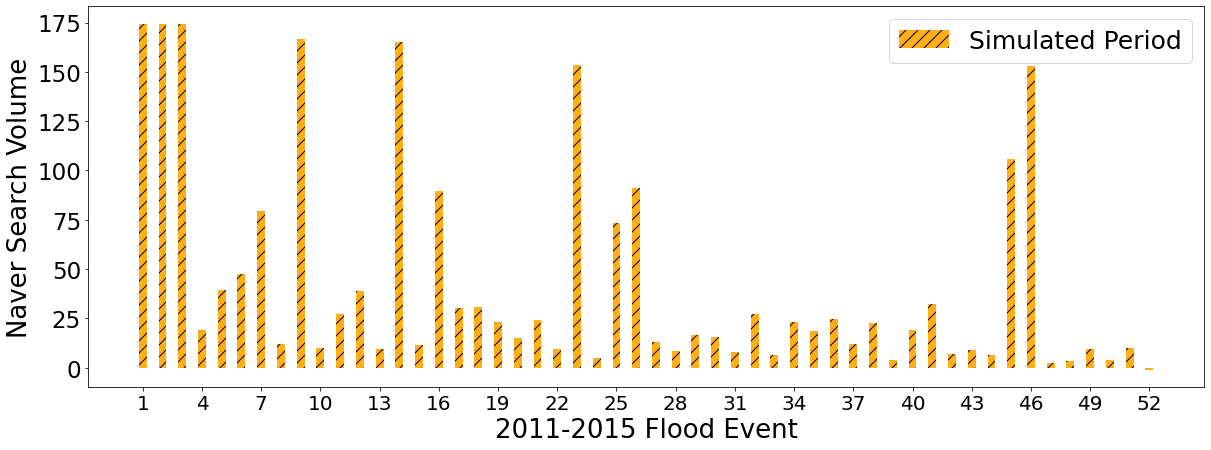

In [56]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 1, 1)

bar_width = 0.4  # 막대 그래프의 너비 설정

ax.bar(flood.ID, flood['naver_xgb'], width=bar_width, color='orange', alpha=0.9, hatch='//', label='Simulated Period')
ax.set_ylabel('Naver Search Volume', fontsize=26)
plt.xlabel('2011-2015 Flood Event', fontsize=26)
plt.legend(fontsize=25)
plt.yticks(fontsize=23)
plt.xticks(flood.ID[::3], fontsize=20)  # x축 간격을 5로 설정
plt.show()

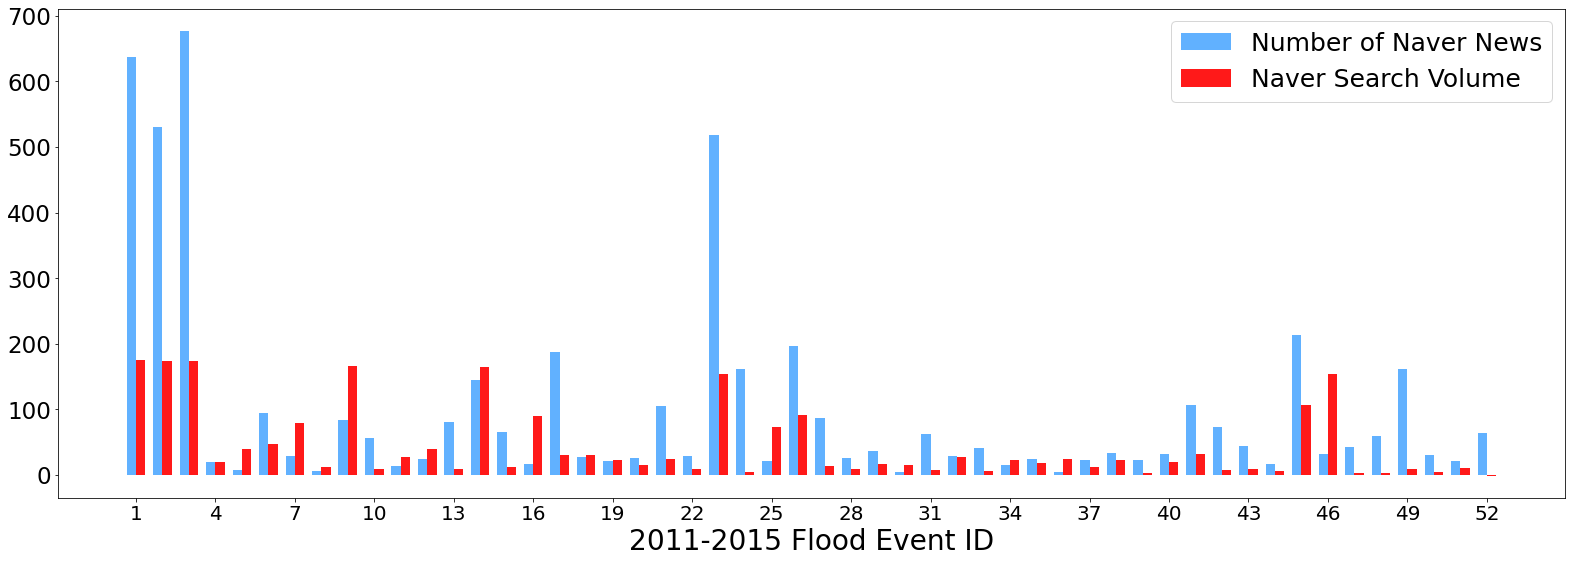

In [57]:
fig = plt.figure(figsize=(27,9)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1)

bar_width = 0.35  # 막대 그래프의 너비 설정

ax.bar(flood.ID - bar_width/2, flood['news'], width=bar_width, color='dodgerblue', alpha=0.7, label='Number of Naver News')
ax.bar(flood.ID + bar_width/2, flood['naver_xgb'], width=bar_width, color='r', alpha=0.9, label='Naver Search Volume')

plt.xlabel('2011-2015 Flood Event ID', fontsize=28)
plt.legend(fontsize=25)
plt.yticks(fontsize=23)
plt.xticks(flood.ID[::3], fontsize=20)  # x축 간격을 5로 설정
plt.show()

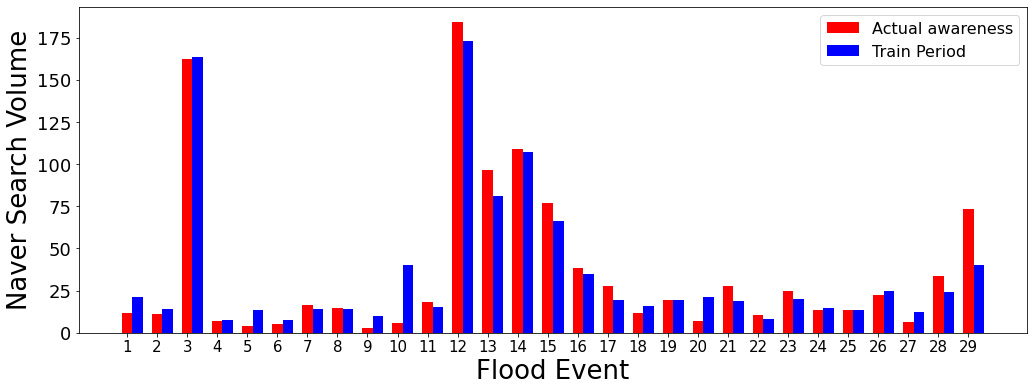

In [139]:
import numpy as np

# Set figure size
plt.figure(figsize=(17, 6))

# Set bar width
bar_width = 0.35

# Create bars for 'awareness' data
plt.bar(outputs_train2.index, outputs_train2['awareness'], color='r', width=bar_width)

# Create bars for 'predicted' data
plt.bar(outputs_train2.index + bar_width, outputs_train2['predicted'], color='b', width=bar_width)

# Set labels and title
plt.ylabel('Naver Search Volume', fontsize=26)
plt.xlabel('Flood Event', fontsize=26)
plt.xticks(outputs_train2.index, fontsize=15)#, rotation=45
plt.yticks(fontsize=18)
#plt.grid(True)
plt.legend(labels=["Actual awareness", "Train Period"], fontsize=16)

# Show plot
plt.show()

In [128]:
#예측 결과값 저장
outputs_train2.to_csv('outputs_train2_xgb.csv')

In [140]:
y_test2= y_test.values
y_test2

array([  6.87155,  36.30036,  93.75179,  15.61321,   4.00115,  16.51203,
       247.405  ,  14.35197])

In [141]:
outputs_test2 = pd.DataFrame(y_test2,columns = ['awareness'])
outputs_test2['predicted'] = y_test_pred
print(outputs_test2)

   awareness   predicted
0    6.87155   12.531685
1   36.30036   80.962410
2   93.75179    7.694030
3   15.61321   14.073882
4    4.00115    7.589674
5   16.51203   15.077968
6  247.40500  173.270004
7   14.35197   24.980804


In [142]:
flood2=flood[29:]

In [143]:
flood2

,ID,flood_event,megalopolis_rainfall,province_rainfall,rainfall,megalopolis_financial_loss,log10_megalopolis_loss,province_financial_loss,log10_province_loss,financial_loss,log10_loss,megalopolis_population,province_population,population,naver,news
ID,,,,,,,,,,,,,,,,
30,30,2018.06.30-2018.06.30,0.0,59.0,59.0,0,0.000000,1145997,6.059183,1145997,6.059183,0,1259754,1259754,6.87155,15
31,31,2018.06.30-2018.07.01,0.0,92.0,92.0,0,0.000000,222248,5.346838,222248,5.346838,0,188308,188308,36.30036,40
32,32,2018.06.30-2018.07.02,0.0,50.0,50.0,0,0.000000,6322,3.800854,6322,3.800854,0,32324,32324,93.75179,119
33,33,2018.07.05-2018.07.06,0.0,185.0,185.0,0,0.000000,809156,5.908032,809156,5.908032,0,1408473,1408473,15.61321,99
34,34,2018.07.28,57.0,0.0,57.0,1000,3.000000,0,0.000000,1000,3.000000,297604,0,297604,4.00115,34
35,35,2018.08.06-2018.08.07,0.0,159.0,159.0,0,0.000000,176976,5.247914,176976,5.247914,0,350940,350940,16.51203,64
36,36,2018.08.26-2018.09.01,1815.0,5830.2,7645.2,5874511,6.768972,35502777,7.550262,41377288,7.616762,9273455,19348574,28494079,247.40500,644
37,37,2018.09.03-2018.09.04,117.0,939.0,1056.0,757601,5.879441,5676869,6.754109,6434470,6.808513,297604,2933963,3231567,14.35197,85


In [144]:
#flood["date"] = pd.to_datetime(flood["date"])
outputs_test2.index = flood2['ID']

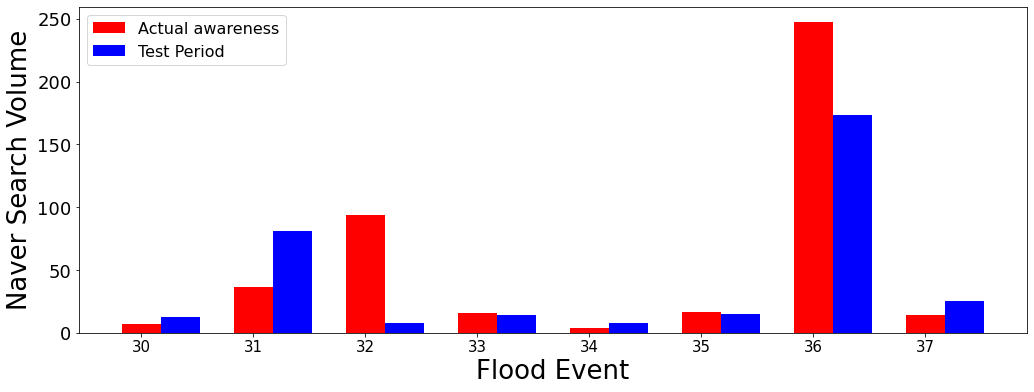

In [145]:
import numpy as np

# Set figure size
plt.figure(figsize=(17, 6))

# Set bar width
bar_width = 0.35

# Create bars for 'awareness' data
plt.bar(outputs_test2.index, outputs_test2['awareness'], color='r', width=bar_width)

# Create bars for 'predicted' data
plt.bar(outputs_test2.index + bar_width, outputs_test2['predicted'], color='b', width=bar_width)

# Set labels and title
plt.ylabel('Naver Search Volume', fontsize=26)
plt.xlabel('Flood Event', fontsize=26)
plt.xticks(outputs_test2.index, fontsize=15)#, rotation=45
plt.yticks(fontsize=18)
#plt.grid(True)
plt.legend(labels=["Actual awareness", "Test Period"], fontsize=16)

# Show plot
plt.show()

In [112]:
outputs_test2.to_csv('outputs_test2_xgb.csv')

In [152]:
flood = pd.read_csv("result_xgb.csv", encoding= 'cp949')
flood.head()

,ID,awareness,predicted
0,1,11.94547,12.191553
1,2,11.09016,10.922505
2,3,162.16290,162.342880
3,4,7.11799,7.058943
4,5,4.03015,4.172897


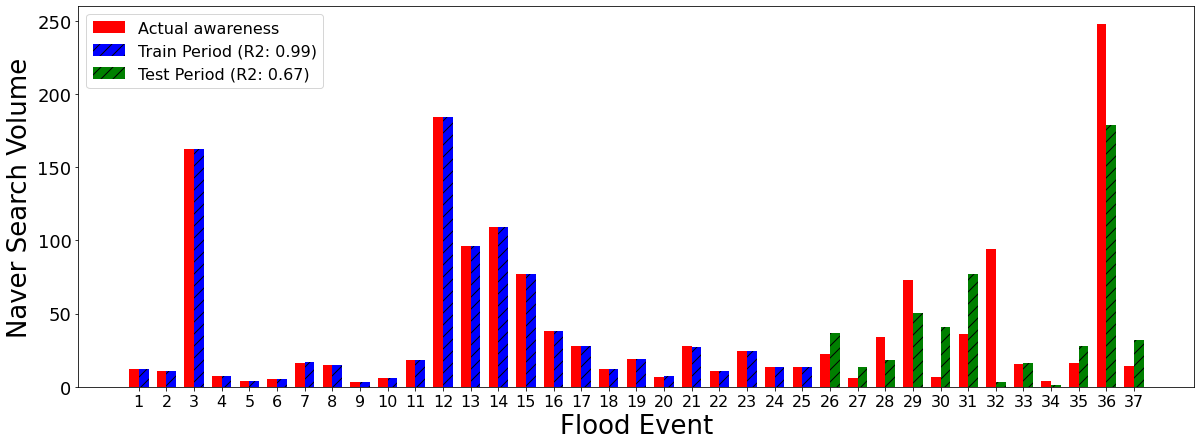

In [153]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 1, 1)

B=pd.DataFrame(flood[:25])
C=pd.DataFrame(flood[25:])

# 바 그래프 생성
bar_width = 0.35
ax.bar(flood.ID - bar_width/2, flood.awareness, label='Actual awareness', color='r', width=bar_width, linewidth=3)
ax.bar(B.ID + bar_width/2, B.predicted, label='Train Period (R2: 0.99)', color='b', hatch='//', width=bar_width, linewidth=3)
ax.bar(C.ID + bar_width/2, C.predicted, label='Test Period (R2: 0.67)', color='g', hatch='//', width=bar_width, linewidth=3)

ax.set_ylabel('Naver Search Volume', fontsize=26)
ax.set_xlabel('Flood Event', fontsize=26)
plt.xticks(flood.ID, fontsize=16)
plt.yticks(fontsize=18)
#plt.grid(True)

plt.savefig('mlr_2016.png')
ax.legend(fontsize=16, loc='best')
plt.show()

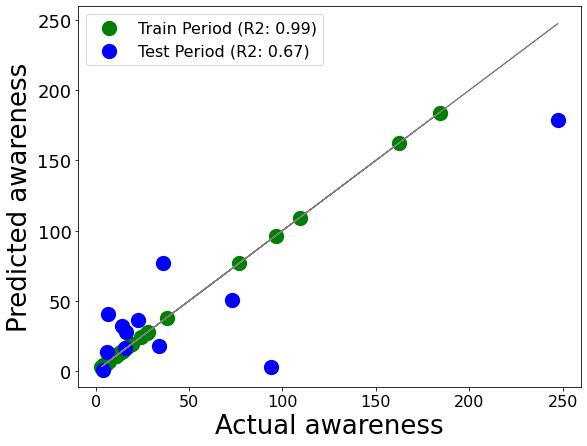

In [155]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(1, 1, 1)

B=pd.DataFrame(flood[:25])
C=pd.DataFrame(flood[25:])

# Y=X 선 생성
y=flood.awareness
plt.plot(y,y, color='#7f7f7f', linewidth=1)

# Scatter plot 생성
#ax.scatter(flood.awareness, flood.predicted, label='Actual awareness', color='r', s=200, linewidth=3)
ax.scatter(B.awareness, B.predicted, label='Train Period (R2: 0.99)', color='g',  s=150, linewidth=3)
ax.scatter(C.awareness, C.predicted, label='Test Period (R2: 0.67)', color='b', s=150, linewidth=3)
ax.set_xlabel('Actual awareness', fontsize=26)
ax.set_ylabel('Predicted awareness', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.grid(True)

plt.savefig('mlr_2016.png')
ax.legend(fontsize=16, loc='best')
plt.show()
